In [1]:
%matplotlib inline
import time
ts = time.time()
from modules.print_funcs import print_header, print_footer, print_midtime, print_endtime
print_header()
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from modules.constants import *


# Started at Sat, 06 Mar 2021 04:04:11 +0900 JST
# ===========================
# Python version:  3.7.0 (default, Jun 28 2018, 13:15:42)  [GCC 7.2.0]
# API version:  1013
# Platform:  linux
# ===========================


In [2]:
def get_crystal_structure_SALMON(fname):
    f = open(fname,'r')
    lines = f.readlines()
    f.close()
    Nlen = len(lines)
    print(Nlen, ': No. of lines of the file, ',fname)
    al = np.zeros(3,dtype='float64')
    for i in lines:
        index = i.find('natom')
        if (index > 0):
            natom = int(i.split('=')[1])
            print(natom)
        index = i.find(' al ')
        if (index > 0):
            temp = i.split('=')[1]
            temp = temp.replace(',', '')
            temp = temp.replace('d','e')
            al[0] = float(temp.split()[0])
            al[1] = float(temp.split()[1])
            al[2] = float(temp.split()[2])
    atomdict = {}
    xred = np.zeros(3,dtype='float64')
    xcart = np.zeros(3,dtype='float64')
    for i in range(Nlen):
        index = lines[i].find('atomic_red_coor')
        if (index > 0):
            for j in range(natom):
                atom = lines[i+j+1].split()[0]
                atom = atom.replace("'", "")
                xred[0]  = lines[i+j+1].split()[1]
                xred[1]  = lines[i+j+1].split()[2]
                xred[2]  = lines[i+j+1].split()[3]
                xcart = xred*al
                atomkindid = lines[i+j+1].split()[4]
                atomdict.update({str(j): [atom, xred, xcart, atomkindid]})
    return al, natom, atomdict

In [3]:
fname = "./input.inp"
al, natom, atomdict = get_crystal_structure_SALMON(fname)
print(al)
print(atomdict.keys())


93 : No. of lines of the file,  ./input.inp
18
[15.06935985  8.70029896  9.8398038 ]
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])


In [4]:
def plot_crystal_structure(al, natom, atomdict):
    #fig = plt.figure(figsize=(4, 8))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for iatom in range(natom):
        value = atomdict[str(iatom)]
        xcart = value[2]
        if (value[0]=='Si'):
            ax.scatter(xcart[0],xcart[1],xcart[2],c='r',s=120,marker="o")
        elif (value[0]=='O'):
            ax.scatter(xcart[0],xcart[1],xcart[2],c='g',s=80,marker="o")
    ax.plot([0.0, al[0]],[0.0, 0.0],[0.0, 0.0],'k--')
    ax.plot([0.0, 0.0],[0.0, al[1]],[0.0, 0.0],'k--')
    ax.plot([0.0, 0.0],[0.0, 0.0],[0.0, al[2]],'k--')
    ax.plot([0.0, al[0]],[al[1],al[1]],[0.0, 0.0],'k--')
    ax.plot([0.0, 0.0],[0.0, al[1]],[al[2],al[2]],'k--')
    ax.plot([al[0], al[0]],[0.0, 0.0],[0.0, al[2]],'k--')
    ax.plot([0.0, al[0]],[0.0, 0.0],[al[2],al[2]],'k--')
    ax.plot([al[0], al[0]],[0.0, al[1]],[0.0, 0.0],'k--')
    ax.plot([al[0], al[0]],[0.0, 0.0],[0.0, al[2]],'k--')
    ax.plot([0.0, 0.0],[al[1],al[1]],[0.0, al[2]],'k--')
    ax.plot([0.0, al[0]],[al[1],al[1]],[al[2],al[2]],'k--')
    ax.plot([al[0], al[0]],[0.0, al[1]],[al[2],al[2]],'k--')
    ax.plot([al[0], al[0]],[al[1],al[1]],[0.0, al[2]],'k--')
    #ax.set_xlim([-1.0, 6.8])
    #ax.set_ylim([-1.0, 6.8])
    #ax.set_zlim([-1.0, 6.8])
    ax.axis('equal')
    plt.show()

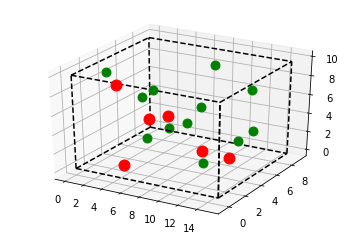

In [5]:
plot_crystal_structure(al, natom, atomdict)